In [37]:
import random
import string
import time
import matplotlib.pyplot as plt

In [38]:

def nextState(p,state,x):
    m=len(p)
    if state<m and x==ord(p[state]):
        return state+1
    
    index=0
    for nextState in range(state,0,-1):
        if ord(p[nextState-1])==x:
            while index<nextState-1:
                if P[state-nextState+1+index]!=P[index]:
                    break
                index+=1
            if index==nextState-1:
                return nextState
    return 0

In [39]:
def transitionFunc(P):
    m=len(P)
    tf=[[0 for i in range(256)] for i in range(m+1)]
    
    for state in range(m+1):
        for x in range(256):
            ns=nextState(P,state,x)
            tf[state][x]=ns
    return tf

In [40]:
def searchFA(text,pattern):
    n=len(text)
    m=len(pattern)
    
    tf=transitionFunc(pattern)
    
    state=0
    for i in range(n):
        state=tf[state][ord(text[i])]
        if state==m:
            print("Pattern matched at ",i-m+1)

In [41]:
T="aabaabaabaabbbbaaaaabbababbabbaaaabbb"
P="abaa"

searchFA(T,P)

Pattern matched at  1
Pattern matched at  4
Pattern matched at  7


--------------

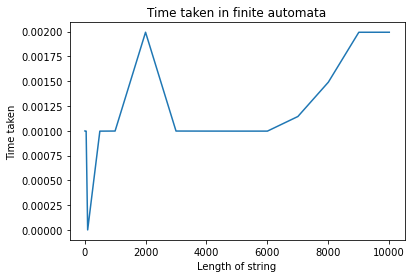

In [42]:
runTime=[]
size=[10,20,50,100,500,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
for i in size:
    N=i
    T=''.join(random.choices(string.ascii_uppercase+string.digits+string.ascii_lowercase, k = N))
    P=''.join(random.choices(string.ascii_uppercase+string.digits+string.ascii_lowercase, k = 3))
    start=time.time()
    searchFA(T,P)
    end=time.time()
    runTime.append(end-start)

plt.plot(size,runTime)
plt.xlabel("Length of string")
plt.ylabel("Time taken")
plt.title("Time taken in finite automata")
plt.show()

The time complexity of string matching by finite automata is of the order O(n).

---------------